# Análisis y Visualización de medidas del suelo

## 1. Obtención de datos

Add imports

In [193]:
import os

import boto3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime

from dotenv import load_dotenv
from soil_moisture import SoilMoisture

Load env vars

In [170]:
load_dotenv()

True

Declare instance of dynamodb

In [194]:
client = boto3.client(
    'dynamodb',
    region_name = os.getenv('REGION'),
    aws_access_key_id=os.getenv('AWS_ACCESS_KEY_ID'),
    aws_secret_access_key=os.getenv('AWS_SECRET_ACCESS_KEY'),
    )
dynamodb = boto3.resource(
    'dynamodb',
    region_name = os.getenv('REGION'),
    aws_access_key_id=os.getenv('AWS_ACCESS_KEY_ID'),
    aws_secret_access_key=os.getenv('AWS_SECRET_ACCESS_KEY'),
    )
ddb_exceptions = client.exceptions
print("Conexión establecida.")

Conexión establecida.


Scanning table

In [195]:
response = dynamodb.Table('soil_measures').scan()
df = pd.DataFrame([SoilMoisture.json_to_class(t).__dict__ for t in response['Items'] ])
df.sort_values(by=['sample_time'], ascending=False)  

,sample_time,device_id,sensor_type,humidity,potassium,nitrogen,ph,temperature,phosphorous
130,1670385406036,1,INTEGRATED,0,213,2,0,24,191
114,1670385391603,1,CAPACITIVE,43,None,None,None,None,None
150,1670385391588,1,RESISTIVE,93,None,None,None,None,None
208,1670385331585,1,CAPACITIVE,51,None,None,None,None,None
222,1670385331578,1,RESISTIVE,99,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...
52,1670378447860,1,CAPACITIVE,43,None,None,None,None,None
120,1670378447847,1,RESISTIVE,68,None,None,None,None,None
55,1670378401851,1,INTEGRATED,15,49,17,1,20,24
197,1670378387405,1,CAPACITIVE,39,None,None,None,None,None


Filter integrated sensor data

In [196]:
integrated_sensor_df = df[df.sensor_type == "INTEGRATED"]
integrated_sensor_df

,sample_time,device_id,sensor_type,humidity,potassium,nitrogen,ph,temperature,phosphorous
3,1670379847756,1,INTEGRATED,15,54,19,1,20,27
6,1670384803521,1,INTEGRATED,2,3,48,1,0,56
8,1670380450217,1,INTEGRATED,15,54,19,1,20,27
11,1670378883811,1,INTEGRATED,15,50,18,1,20,25
12,1670379245287,1,INTEGRATED,16,50,18,1,20,25
15,1670381775638,1,INTEGRATED,15,54,19,1,20,26
20,1670381534637,1,INTEGRATED,15,55,19,1,20,27
21,1670379124795,1,INTEGRATED,16,51,18,1,20,25
23,1670380811755,1,INTEGRATED,15,54,19,1,20,27
31,1670381655125,1,INTEGRATED,15,54,19,1,20,27


## 2. Análisis de datos

In [197]:
def transform_to_date(x):
    return datetime.fromtimestamp(x/1000)

integrated_sensor_df.sample_time = integrated_sensor_df.sample_time.astype(int)
integrated_sensor_df.sample_time = integrated_sensor_df.sample_time.map(transform_to_date)

integrated_sensor_df.sample_time


/var/folders/zr/5cp0kjw90ldcs2bbgq01m31w0000gn/T/ipykernel_65687/2628222138.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/zr/5cp0kjw90ldcs2bbgq01m31w0000gn/T/ipykernel_65687/2628222138.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



3     2022-12-06 21:24:07.756
6     2022-12-06 22:46:43.521
8     2022-12-06 21:34:10.217
11    2022-12-06 21:08:03.811
12    2022-12-06 21:14:05.287
15    2022-12-06 21:56:15.638
20    2022-12-06 21:52:14.637
21    2022-12-06 21:12:04.795
23    2022-12-06 21:40:11.755
31    2022-12-06 21:54:15.125
39    2022-12-06 22:23:28.668
50    2022-12-06 22:00:16.662
55    2022-12-06 21:00:01.851
78    2022-12-06 21:04:02.843
90    2022-12-06 21:48:13.655
91    2022-12-06 22:37:27.800
101   2022-12-06 22:25:29.162
105   2022-12-06 21:22:07.256
107   2022-12-06 21:32:09.832
110   2022-12-06 21:58:16.109
121   2022-12-06 21:44:12.668
129   2022-12-06 21:36:10.760
130   2022-12-06 22:56:46.036
131   2022-12-06 21:26:08.246
143   2022-12-06 21:20:06.759
149   2022-12-06 21:28:08.736
153   2022-12-06 22:04:17.585
155   2022-12-06 21:46:13.170
158   2022-12-06 21:42:12.180
161   2022-12-06 21:02:02.328
170   2022-12-06 21:38:11.195
174   2022-12-06 21:06:03.339
175   2022-12-06 21:18:06.280
182   2022

In [198]:
values_sample_time = integrated_sensor_df.sample_time.to_numpy()


In [199]:
values_sample_time


array(['2022-12-06T21:24:07.756000000', '2022-12-06T22:46:43.521000000',
       '2022-12-06T21:34:10.217000000', '2022-12-06T21:08:03.811000000',
       '2022-12-06T21:14:05.287000000', '2022-12-06T21:56:15.638000000',
       '2022-12-06T21:52:14.637000000', '2022-12-06T21:12:04.795000000',
       '2022-12-06T21:40:11.755000000', '2022-12-06T21:54:15.125000000',
       '2022-12-06T22:23:28.668000000', '2022-12-06T22:00:16.662000000',
       '2022-12-06T21:00:01.851000000', '2022-12-06T21:04:02.843000000',
       '2022-12-06T21:48:13.655000000', '2022-12-06T22:37:27.800000000',
       '2022-12-06T22:25:29.162000000', '2022-12-06T21:22:07.256000000',
       '2022-12-06T21:32:09.832000000', '2022-12-06T21:58:16.109000000',
       '2022-12-06T21:44:12.668000000', '2022-12-06T21:36:10.760000000',
       '2022-12-06T22:56:46.036000000', '2022-12-06T21:26:08.246000000',
       '2022-12-06T21:20:06.759000000', '2022-12-06T21:28:08.736000000',
       '2022-12-06T22:04:17.585000000', '2022-12-06

### Humedad

In [200]:
humidity = integrated_sensor_df.humidity.to_numpy()
humidity

array([Decimal('15'), Decimal('2'), Decimal('15'), Decimal('15'),
       Decimal('16'), Decimal('15'), Decimal('15'), Decimal('16'),
       Decimal('15'), Decimal('15'), Decimal('3'), Decimal('15'),
       Decimal('15'), Decimal('16'), Decimal('15'), Decimal('12'),
       Decimal('1'), Decimal('15'), Decimal('15'), Decimal('15'),
       Decimal('15'), Decimal('15'), Decimal('0'), Decimal('15'),
       Decimal('15'), Decimal('15'), Decimal('15'), Decimal('15'),
       Decimal('15'), Decimal('16'), Decimal('15'), Decimal('16'),
       Decimal('15'), Decimal('24'), Decimal('16'), Decimal('15'),
       Decimal('0'), Decimal('15'), Decimal('15'), Decimal('24'),
       Decimal('16'), Decimal('15'), Decimal('15')], dtype=object)

#### Valores estadísticos

In [201]:
print("Mínimo: \t\t", np.amin(humidity))
print("Máximo: \t\t", np.amax(humidity))
print("Mediana: \t\t", np.median(humidity))
print("Media: \t\t\t", np.mean(humidity))
print("Desviación estándar: \t", np.std(humidity))
print("Varianza: \t\t", np.var(humidity))

Mínimo: 		 0
Máximo: 		 24
Mediana: 		 15
Media: 			 13.90697674418604651162790698
Desviación estándar: 	 5.024655274480642802533060355
Varianza: 		 25.24716062736614386154678205


#### Gráfica de puntos

Text(0.5, 0, 'Time')

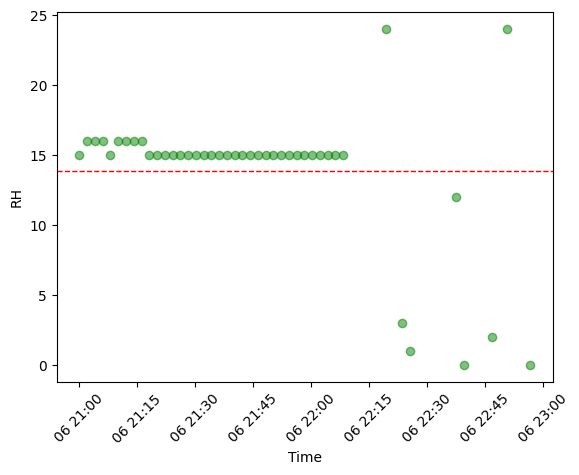

In [180]:
fig, ax = plt.subplots()
ax.scatter(values_sample_time, humidity, c="green", alpha=0.5)
plt.xticks(rotation=45)
plt.axhline(y=np.nanmean(humidity), color='red', linestyle='--', linewidth=1, label='Avg')
ax.set_ylabel("RH")
ax.set_xlabel("Time")


**Análisis:** 

Considerando los valores estadísticos obtenidos y la gráfica.
Se tiene una humedad relativa (RH) promedio de 15 y una media con un valor de 13,90. Dado que la humedad relativa se representa en porcentaje, se puede inferir que de acuerdo a los datos se tiene una humedad promedio de 15%RH

De acuerdo con la literatura revisada, el requerimiento agroclimático para el cultivo de repollo, en lo que refiere a la humedad relativa, se espera que este en un porcentaje de 60% a 80%. 



### Temperatura

In [202]:
temperature = integrated_sensor_df.temperature.to_numpy()
temperature

array([Decimal('20'), Decimal('0'), Decimal('20'), Decimal('20'),
       Decimal('20'), Decimal('20'), Decimal('20'), Decimal('20'),
       Decimal('20'), Decimal('20'), Decimal('16'), Decimal('20'),
       Decimal('20'), Decimal('20'), Decimal('20'), Decimal('0'),
       Decimal('16'), Decimal('20'), Decimal('20'), Decimal('20'),
       Decimal('20'), Decimal('20'), Decimal('24'), Decimal('20'),
       Decimal('20'), Decimal('20'), Decimal('20'), Decimal('20'),
       Decimal('20'), Decimal('20'), Decimal('20'), Decimal('20'),
       Decimal('20'), Decimal('21'), Decimal('20'), Decimal('20'),
       Decimal('24'), Decimal('20'), Decimal('20'), Decimal('2'),
       Decimal('20'), Decimal('20'), Decimal('20')], dtype=object)

#### Valores estadísticos

In [203]:
print("Mínimo: \t\t", np.amin(temperature))
print("Máximo: \t\t", np.amax(temperature))
print("Mediana: \t\t", np.median(temperature))
print("Media: \t\t\t", np.mean(temperature))
print("Desviación estándar: \t", np.std(temperature))
print("Varianza: \t\t", np.var(temperature))

Mínimo: 		 0
Máximo: 		 24
Mediana: 		 20
Media: 			 18.67441860465116279069767442
Desviación estándar: 	 5.088614423888167237997898044
Varianza: 		 25.89399675500270416441319630


#### Gráfica de puntos

Text(0.5, 0, 'Time')

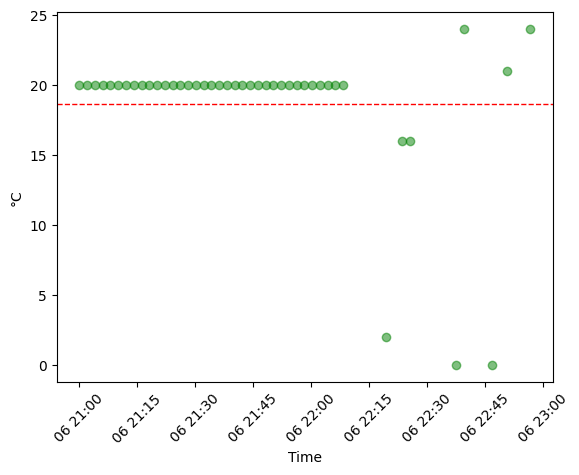

In [204]:
fig, ax = plt.subplots()
ax.scatter(values_sample_time, temperature, c="green", alpha=0.5)
plt.xticks(rotation=45)
plt.axhline(y=np.nanmean(temperature), color='red', linestyle='--', linewidth=1, label='Avg')
ax.set_ylabel("°C")
ax.set_xlabel("Time")

**Análisis:** 

Considerando los valores estadísticos obtenidos y la gráfica. Se tiene una temperatura en grados centígrados (°C) promedio de 20 y una media con un valor de 18,68. 

De acuerdo con la literatura revisada, el requerimiento agroclimático para el cultivo de repollo, en lo que refiere a la temperatura, se espera que este en un porcentaje de °C 15% - 20%.

En este caso, el semillero de prueba cuenta con una temperatura que está alcanzando el umbral de los valores esperados. Lo ideal es que este este entre los valores 15 - 20 y no en el mínimo o máximo.

### pH

In [205]:
pH = integrated_sensor_df.ph.to_numpy()
pH

array([Decimal('1'), Decimal('1'), Decimal('1'), Decimal('1'),
       Decimal('1'), Decimal('1'), Decimal('1'), Decimal('1'),
       Decimal('1'), Decimal('1'), Decimal('1'), Decimal('1'),
       Decimal('1'), Decimal('1'), Decimal('1'), Decimal('2'),
       Decimal('1'), Decimal('1'), Decimal('1'), Decimal('1'),
       Decimal('1'), Decimal('1'), Decimal('0'), Decimal('1'),
       Decimal('1'), Decimal('1'), Decimal('1'), Decimal('1'),
       Decimal('1'), Decimal('1'), Decimal('1'), Decimal('1'),
       Decimal('1'), Decimal('0'), Decimal('1'), Decimal('1'),
       Decimal('0'), Decimal('1'), Decimal('1'), Decimal('0'),
       Decimal('1'), Decimal('1'), Decimal('1')], dtype=object)

#### Valores estadísticos

In [206]:
print("Mínimo: \t\t", np.amin(pH))
print("Máximo: \t\t", np.amax(pH))
print("Mediana: \t\t", np.median(pH))
print("Media: \t\t\t", np.mean(pH))
print("Desviación estándar: \t", np.std(pH))
print("Varianza: \t\t", np.var(pH))

Mínimo: 		 0
Máximo: 		 2
Mediana: 		 1
Media: 			 0.9302325581395348837209302326
Desviación estándar: 	 0.3337837231257517150466116193
Varianza: 		 0.1114115738236884802595997835


#### Gráfica de puntos

Text(0.5, 0, 'Time')

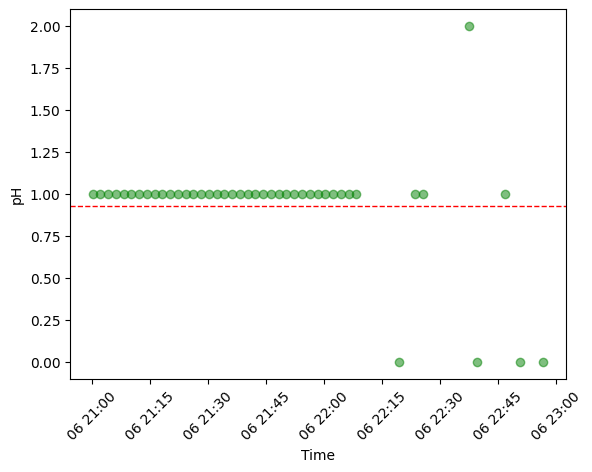

In [208]:
fig, ax = plt.subplots()
ax.scatter(values_sample_time, pH, c="green", alpha=0.5)
plt.xticks(rotation=45)
plt.axhline(y=np.nanmean(pH), color='red', linestyle='--', linewidth=1, label='Avg')
ax.set_ylabel("pH")
ax.set_xlabel("Time")

**Análisis:** 

Considerando los valores estadísticos obtenidos y la gráfica. 
El pH se tiene como promedio 1 y una media con un valor de 0,93. 

De acuerdo con la literatura revisada, el requerimiento agroclimático para el cultivo de repollo, en lo que refiere a la pH, se espera que este en un rango de 5.5 - 6.8.

En este caso, el semillero de prueba se obtienen valores de 1.

### Nitrógeno

In [184]:
nitrogen = integrated_sensor_df.nitrogen.to_numpy()
nitrogen

array([Decimal('19'), Decimal('48'), Decimal('19'), Decimal('18'),
       Decimal('18'), Decimal('19'), Decimal('19'), Decimal('18'),
       Decimal('19'), Decimal('19'), Decimal('0'), Decimal('19'),
       Decimal('17'), Decimal('18'), Decimal('19'), Decimal('0'),
       Decimal('2'), Decimal('19'), Decimal('19'), Decimal('19'),
       Decimal('19'), Decimal('19'), Decimal('2'), Decimal('19'),
       Decimal('19'), Decimal('19'), Decimal('19'), Decimal('19'),
       Decimal('19'), Decimal('17'), Decimal('19'), Decimal('17'),
       Decimal('18'), Decimal('3'), Decimal('18'), Decimal('19'),
       Decimal('3'), Decimal('19'), Decimal('19'), Decimal('0'),
       Decimal('17'), Decimal('19'), Decimal('19')], dtype=object)

#### Valores estadísticos

In [185]:
print("Mínimo: \t\t", np.amin(nitrogen))
print("Máximo: \t\t", np.amax(nitrogen))
print("Mediana: \t\t", np.median(nitrogen))
print("Media: \t\t\t", np.mean(nitrogen))
print("Desviación estándar: \t", np.std(nitrogen))
print("Varianza: \t\t", np.var(nitrogen))

Mínimo: 		 0
Máximo: 		 48
Mediana: 		 19
Media: 			 16.48837209302325581395348837
Desviación estándar: 	 8.018502130677918384964602693
Varianza: 		 64.29637641968631692806922667


#### Gráfica de puntos

Text(0.5, 0, 'Time')

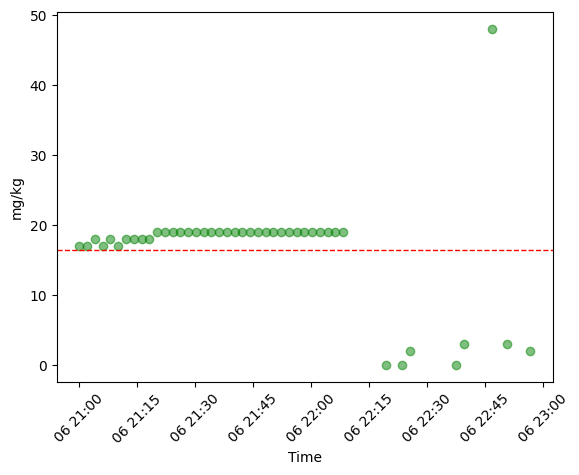

In [186]:
fig, ax = plt.subplots()
ax.scatter(values_sample_time, nitrogen, c="green", alpha=0.5)
plt.xticks(rotation=45)
plt.axhline(y=np.nanmean(nitrogen), color='red', linestyle='--', linewidth=1, label='Avg')
ax.set_ylabel("mg/kg")
ax.set_xlabel("Time")

**Análisis:** 





Considerando los valores estadísticos obtenidos y la gráfica. 
Se tiene que el valor promedio de Nitrógeno es de 19 mg/kg (miligramos por kilogramo). 
La media tiene un valor de 16.49 mg/kg.

De acuerdo con la literatura revisada, el requerimiento agroclimático para el cultivo de repollo, en lo que refiere a al nitrógeno, se espera que esté en un rango de 100 - 200 kg/ha (10000 – 20000 mg/m2).



### Fósforo

In [187]:
phosphorous = integrated_sensor_df.phosphorous.to_numpy()
phosphorous

array([Decimal('27'), Decimal('56'), Decimal('27'), Decimal('25'),
       Decimal('25'), Decimal('26'), Decimal('27'), Decimal('25'),
       Decimal('27'), Decimal('27'), Decimal('0'), Decimal('27'),
       Decimal('24'), Decimal('25'), Decimal('27'), Decimal('128'),
       Decimal('128'), Decimal('27'), Decimal('27'), Decimal('27'),
       Decimal('27'), Decimal('27'), Decimal('191'), Decimal('27'),
       Decimal('27'), Decimal('27'), Decimal('27'), Decimal('27'),
       Decimal('27'), Decimal('25'), Decimal('27'), Decimal('25'),
       Decimal('25'), Decimal('28'), Decimal('25'), Decimal('27'),
       Decimal('28'), Decimal('27'), Decimal('27'), Decimal('19'),
       Decimal('25'), Decimal('27'), Decimal('27')], dtype=object)

#### Valores estadísticos

In [188]:
print("Mínimo: \t\t", np.amin(phosphorous))
print("Máximo: \t\t", np.amax(phosphorous))
print("Mediana: \t\t", np.median(phosphorous))
print("Media: \t\t\t", np.mean(phosphorous))
print("Desviación estándar: \t", np.std(phosphorous))
print("Varianza: \t\t", np.var(phosphorous))

Mínimo: 		 0
Máximo: 		 191
Mediana: 		 27
Media: 			 34.90697674418604651162790698
Desviación estándar: 	 32.81081355603303983241766517
Varianza: 		 1076.549486208761492698756085


#### Gráfica de puntos

Text(0.5, 0, 'Time')

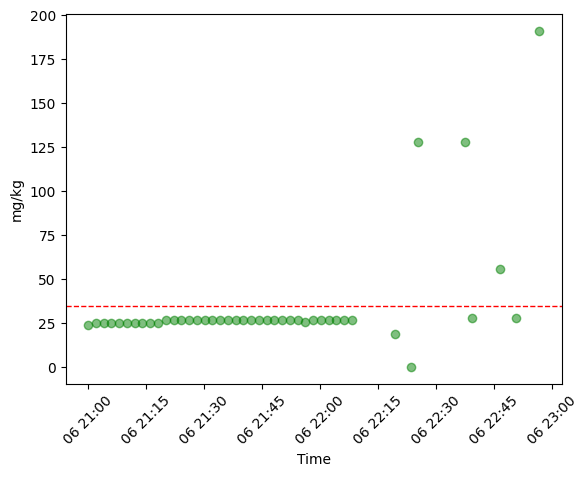

In [189]:
fig, ax = plt.subplots()
ax.scatter(values_sample_time, phosphorous, c="green", alpha=0.5)
plt.xticks(rotation=45)
plt.axhline(y=np.nanmean(phosphorous), color='red', linestyle='--', linewidth=1, label='Avg')
ax.set_ylabel("mg/kg")
ax.set_xlabel("Time")

**Análisis:** 





Considerando los valores estadísticos obtenidos y la gráfica. 
Se tiene que el valor promedio de fósforo es de 27 mg/kg (miligramos por kilogramo). 
La media tiene un valor de 34.91 mg/kg.

De acuerdo con la literatura revisada, el requerimiento agroclimático para el cultivo de repollo, en lo que refiere a al fósforo, se espera que esté en un rango de 150 - 200 kg/ha (15000 – 20000 mg/m2).



### Potasio

In [190]:
potassium = integrated_sensor_df.potassium.to_numpy()
potassium

array([Decimal('54'), Decimal('3'), Decimal('54'), Decimal('50'),
       Decimal('50'), Decimal('54'), Decimal('55'), Decimal('51'),
       Decimal('54'), Decimal('54'), Decimal('54'), Decimal('54'),
       Decimal('49'), Decimal('49'), Decimal('54'), Decimal('240'),
       Decimal('32'), Decimal('54'), Decimal('54'), Decimal('54'),
       Decimal('54'), Decimal('54'), Decimal('213'), Decimal('55'),
       Decimal('54'), Decimal('54'), Decimal('54'), Decimal('54'),
       Decimal('54'), Decimal('50'), Decimal('55'), Decimal('51'),
       Decimal('51'), Decimal('0'), Decimal('51'), Decimal('54'),
       Decimal('255'), Decimal('54'), Decimal('55'), Decimal('128'),
       Decimal('51'), Decimal('54'), Decimal('54')], dtype=object)

#### Valores estadísticos

In [191]:
print("Mínimo: \t\t", np.amin(potassium))
print("Máximo: \t\t", np.amax(potassium))
print("Mediana: \t\t", np.median(potassium))
print("Media: \t\t\t", np.mean(potassium))
print("Desviación estándar: \t", np.std(potassium))
print("Varianza: \t\t", np.var(potassium))

Mínimo: 		 0
Máximo: 		 255
Mediana: 		 54
Media: 			 64.69767441860465116279069767
Desviación estándar: 	 49.87917255786013389986900515
Varianza: 		 2487.931855056787452677122765


#### Gráfica de puntos

Text(0.5, 0, 'Time')

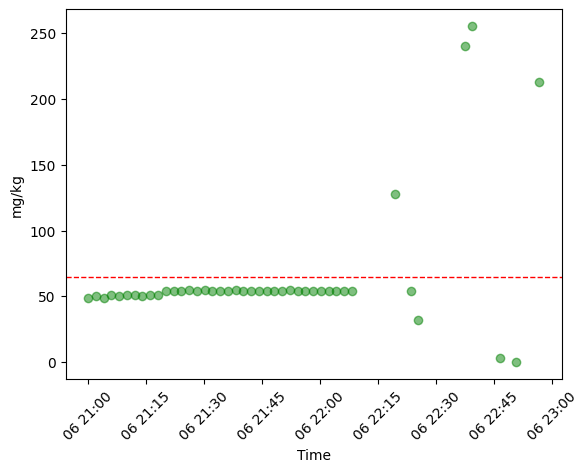

In [192]:
fig, ax = plt.subplots()
ax.scatter(values_sample_time, potassium, c="green", alpha=0.5)
plt.xticks(rotation=45)
plt.axhline(y=np.nanmean(potassium), color='red', linestyle='--', linewidth=1, label='Avg')
ax.set_ylabel("mg/kg")
ax.set_xlabel("Time")

**Análisis:** 

Considerando los valores estadísticos obtenidos y la gráfica. 
Se tiene que el valor promedio de Potasio es de 54 mg/kg (miligramos por kilogramo). 
La media tiene un valor de 64.70 mg/kg.

De acuerdo con la literatura revisada, el requerimiento agroclimático para el cultivo de repollo, en lo que refiere a al potasio, se espera que esté en un valor aproximado de 75kg/ha (7500 mg/m2).

